700


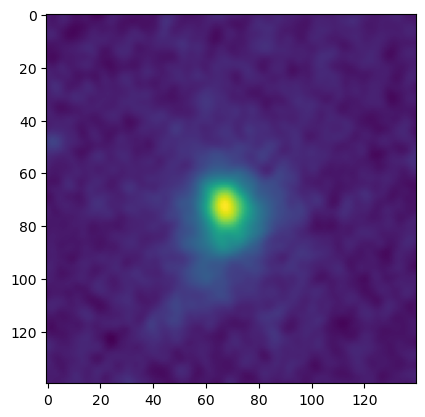

In [2]:
import pysap
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import ticker

hudl = fits.open('ICM_old/data/map2048_MILCA_Coma_20deg_G.fits')
image = hudl[1].data
print(hudl[1].header['NAXIS1'])
transform_klass = pysap.load_transform("db3")
transform = transform_klass(nb_scale=4, verbose=1, padding_mode="symmetric")
transform.data = image
transform.analysis()
rec_image = transform.synthesis()
#plt.imshow((image.data-rec_image.data)[279:419,282:422]/np.max(np.abs(rec_image.data)))
plt.imshow(rec_image.data[279:419,282:422])

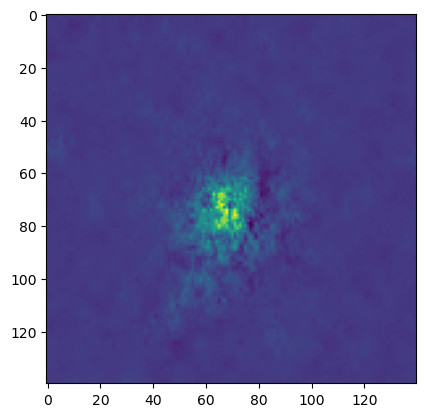

In [4]:
def gaussian_heatmap(center, image_size, sig = 1):
    """
    It produces single gaussian at expected center
    :param center:  the mean position (X, Y) - where high value expected
    :param image_size: The total image size (width, height)
    :param sig: The sigma value
    :return:
    """
    x_axis = np.linspace(0, image_size[0]-1, image_size[0]) - center[0]
    y_axis = np.linspace(0, image_size[1]-1, image_size[1]) - center[1]
    xx, yy = np.meshgrid(x_axis, y_axis)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel

# contour lines
kernel = gaussian_heatmap(center = (350, 350), image_size = (700, 700), sig = 50)
plt.contour((rec_image.data*kernel)[279:419,282:422],np.linspace(0,np.max(rec_image.data),10))

plt.imshow((image.data-rec_image.data)[279:419,282:422]/np.max(np.abs(rec_image.data)))
plt.show()